In [ ]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
df= pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#checking the number of missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
print(df.fuel.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [ ]:
print(df.seller_type.value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [ ]:
print(df.transmission.value_counts())

Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [ ]:
print(df.owner.value_counts())

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


Encoding the categorical data

In [ ]:
#fuel tag
df.replace({'fuel': {'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace=True)

#seller_type 
df.replace({'seller_type': {'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace=True)

#transmission
df.replace({'transmission': {'Manual':0, '':1, 'Automatic':2}}, inplace=True)

#owner
df.replace({'owner': {'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


Train Test Split

In [ ]:
x= df.drop(['name', 'selling_price'], axis= 1)
y= df['selling_price']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.8, random_state=3)

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction= model.predict(x_train)

# R squared error
error_score= metrics.r2_score(y_train, training_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.4073997412697773


Visualizing the actual prices andd predicted prices

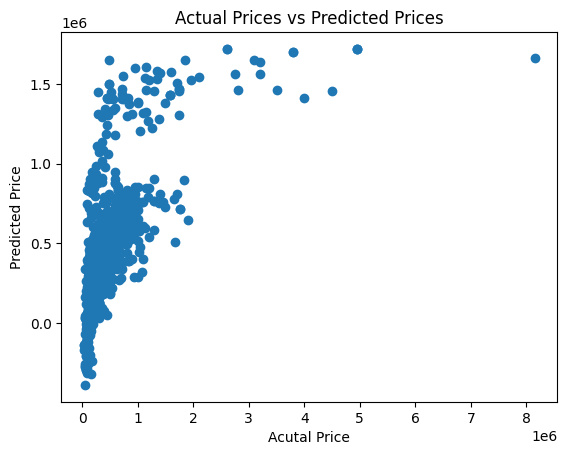

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Acutal Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
testing_data_prediction= model.predict(x_test)

# R squared error
error_score2= metrics.r2_score(y_test, testing_data_prediction)
print('R squared error: ', error_score2)

R squared error:  0.447678776326599


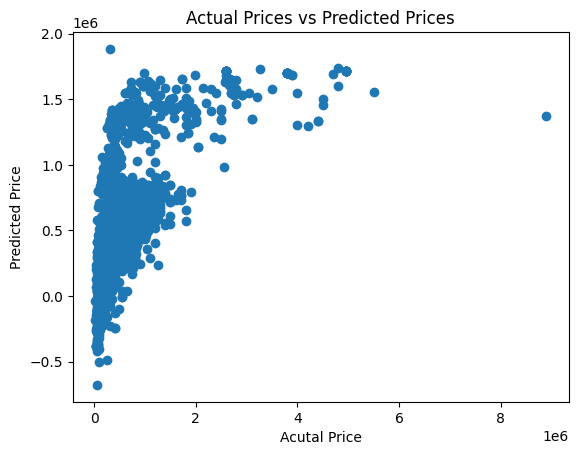

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Acutal Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

LASSO REGRESSION

In [ ]:
model2= Lasso()

In [ ]:
model2.fit(x_train, y_train)

Lasso()

Model Evaluation

In [ ]:
training_data_prediction= model2.predict(x_train)

# R squared error
error_score= metrics.r2_score(y_train, training_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.4073997412419892


In [ ]:
testing_data_prediction= model2.predict(x_test)

# R squared error
error_score2= metrics.r2_score(y_test, testing_data_prediction)
print('R squared error: ', error_score2)

R squared error:  0.44767902989518593


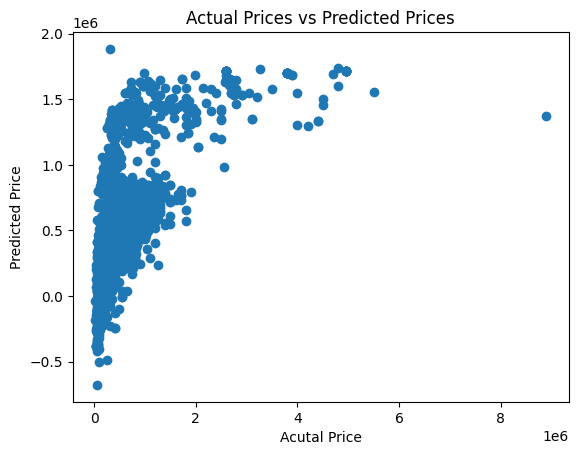

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Acutal Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()